/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107 (428.00 B)

 Trainable params: 107 (428.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3225 - loss: 1.6430 - val_accuracy: 0.3260 - val_loss: 1.6086
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3446 - loss: 1.6186 - val_accuracy: 0.3676 - val_loss: 1.5778
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4081 - loss: 1.5599 - val_accuracy: 0.4167 - val_loss: 1.5468
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4051 - loss: 1.5560 - val_accuracy: 0.4730 - val_loss: 1.5169
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4409 - loss: 1.5278 - val_accuracy: 0.5368 - val_loss: 1.4873
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4676 - loss: 1.5026 - val_accuracy: 0.5613 - val_loss: 1.4597
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5039 - loss: 1.4582 - val_accuracy: 0.5833 - val_loss: 1.4325
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 1.4438 - val_accuracy: 0.607

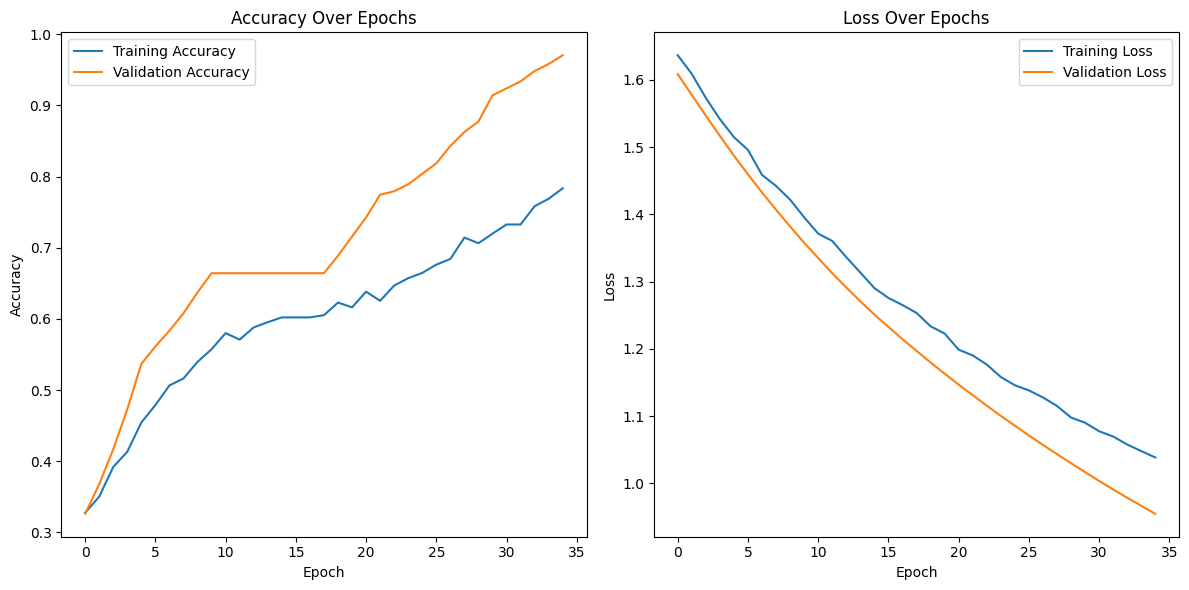

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('cStick_data.xlsx')

# Separate features and target
X = data[['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer']]
y = data['Fall']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target
y_one_hot = tf.keras.utils.to_categorical(y, num_classes=3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42, stratify=y)

# Model with regularization
model = Sequential([
    Dense(8, input_dim=6, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.2),
    Dense(4, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Custom EarlyStopping callback
class CustomEarlyStopping(Callback):
    def __init__(self, stop_epoch):
        super(CustomEarlyStopping, self).__init__()
        self.stop_epoch = stop_epoch

    def on_epoch_end(self, epoch, logs=None):
        if epoch >= self.stop_epoch:
            self.model.stop_training = True
            print(f"\nStopping training at epoch {epoch + 1}.")

# Define the specific epoch to stop training
specific_epoch = 34

# Create an instance of the custom early stopping
custom_early_stopping = CustomEarlyStopping(stop_epoch=specific_epoch)

# Print model summary
print(model.summary())

# Train the model with Custom Early Stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[custom_early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")

# Plot training and validation metrics
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


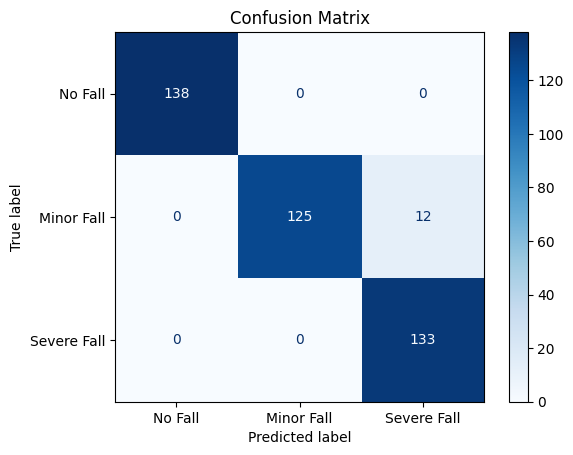

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the test set
y_pred_probs = model.predict(X_test)  # Get probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded true labels to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fall', 'Minor Fall', 'Severe Fall'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
